In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits

In [2]:
path2file = './dr3_tutorial-result.fits'
data = fits.getdata(path2file)

In [3]:
print(len(data))

445276


In [4]:
data.dtype.names

('source_id',
 'random_index',
 'ra',
 'dec',
 'parallax',
 'parallax_error',
 'parallax_over_error',
 'phot_g_mean_mag',
 'phot_g_mean_flux_over_error',
 'phot_bp_mean_mag',
 'phot_bp_mean_flux_over_error',
 'phot_rp_mean_mag',
 'phot_rp_mean_flux_over_error',
 'bp_rp',
 'phot_mean_mg',
 'phot_mean_mg_error',
 'phot_variable_flag',
 'in_qso_candidates',
 'in_galaxy_candidates',
 'non_single_star',
 'classprob_dsc_combmod_quasar',
 'classprob_dsc_combmod_galaxy',
 'classprob_dsc_combmod_star',
 'classprob_dsc_combmod_whitedwarf',
 'classprob_dsc_combmod_binarystar',
 'teff_gspphot',
 'teff_gspphot_lower',
 'teff_gspphot_upper',
 'logg_gspphot',
 'logg_gspphot_lower',
 'logg_gspphot_upper',
 'mh_gspphot',
 'mh_gspphot_lower',
 'mh_gspphot_upper',
 'distance_gspphot',
 'distance_gspphot_lower',
 'distance_gspphot_upper',
 'azero_gspphot',
 'azero_gspphot_lower',
 'azero_gspphot_upper',
 'ag_gspphot',
 'ag_gspphot_lower',
 'ag_gspphot_upper',
 'ebpminrp_gspphot',
 'ebpminrp_gspphot_lower'

# Stars Distribution

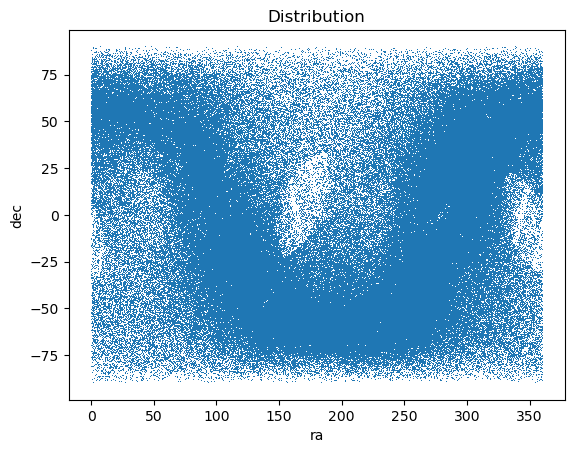

In [5]:
plt.plot(data['ra'], 
         data['dec'], 
         ',')

plt.xlabel('ra')
plt.ylabel('dec')
plt.title('Distribution')

plt.show()

# (I) HR Diagram
Using the catalog, make two versions of the HR diagram.  
In the first HR diagram, use the derived temperature ($T_{eff}$) and luminosity ($L$) as the x and y axes,  
respectively. In addition, colorize the plot using the derived mass. **[5 pts]**  

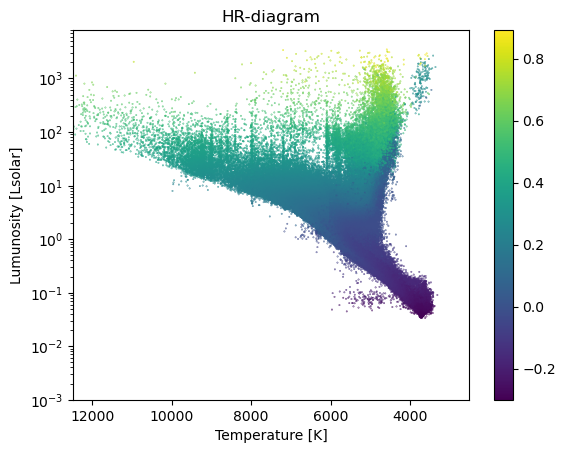

In [6]:
temperature = data['teff_gspphot']
luminosity = data['lum_flame'],
mass = data['mass_flame']

# plt.plot(temperature, luminosity, ',')
plt.scatter(temperature, luminosity, c = np.log10(mass), s = 0.1)
plt.colorbar()

plt.yscale('log')

plt.xlim([12500, 2500])
plt.ylim([1e-3, 8e3])

plt.xlabel('Temperature [K]')
plt.ylabel('Lumunosity [Lsolar]')
plt.title('HR-diagram')

plt.show()

In the second diagram, as referred to as the color-magnitude diagram (CMD), use the observed  
color ($G_{BP}-G_{rp}$) and absolute magnitude ($G_{abs}$) as the x and y axes, respectively. In addition,  
colorize the plot using the derived iron abundance ($[Fe/H$). **[5 pts]**  

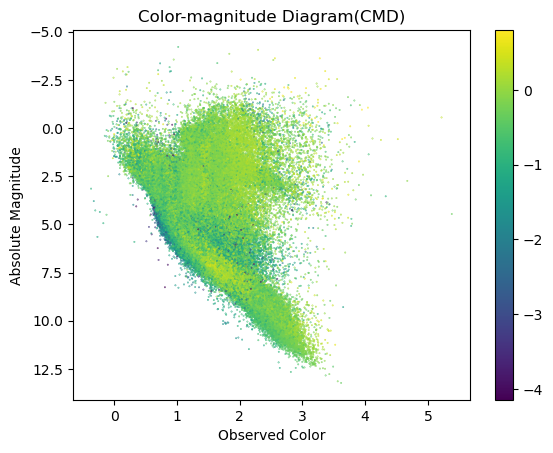

In [7]:
x = data['bp_rp']
y = data['phot_mean_mg'],
c = data['mh_gspphot']

# plt.plot(temperature, luminosity, ',')
plt.scatter(x, y, c = c, s = 0.1)
plt.colorbar()

plt.gca().invert_yaxis()

plt.xlabel('Observed Color')
plt.ylabel('Absolute Magnitude')
plt.title('Color-magnitude Diagram(CMD)')

plt.show()

# (II) Theoretically Predicted
Continued from (I). In the first version of the HR diagram (i.e., the luminosity v.s. temperature  
diagram), over-plot the theoretically predicted $L-T_{eff}$ relation of main-sequence stars assuming  
that the main-sequence stars (1) are perfect blackbody, (2) have uniform mass density $\rho = \rho_\odot$,  
where $\rho_\odot$ is the mass density of the Sun, and (3) satisfy the Virial theorem. **[12 pts]**  

In [8]:
def calcL(temperature, radius):
    sigma = 5.6e-8
    Lsun = 3.8e26
    return 4*np.pi*radius**2*sigma*temperature**4 / Lsun

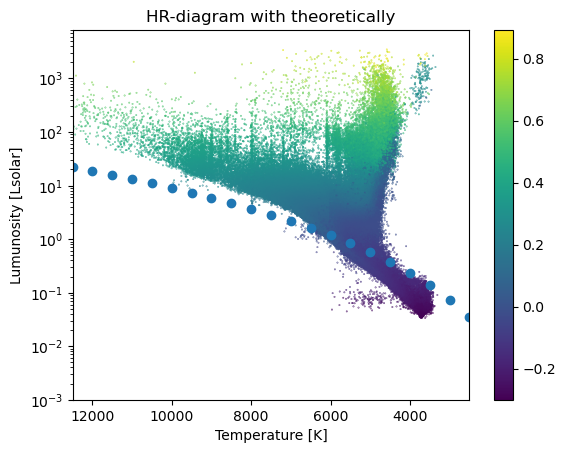

In [9]:
# theoretically
temperature_array = [i for i in range(1000, 20000, 500)]
lum = [calcL(temperature, radius = 7e8) for temperature in temperature_array]

plt.plot(temperature_array, lum, 'o')

temperature = data['teff_gspphot']
luminosity = data['lum_flame'],
mass = data['mass_flame']

# plt.plot(temperature, luminosity, ',')
plt.scatter(temperature, luminosity, c = np.log10(mass), s = 0.1)
plt.colorbar()

plt.yscale('log')

plt.xlim([12500, 2500])
plt.ylim([1e-3, 8e3])

plt.xlabel('Temperature [K]')
plt.ylabel('Lumunosity [Lsolar]')
plt.title('HR-diagram with theoretically')

plt.show()

# (III) Color-color Diagram
Make the color-color (CC) diagram with the SDSS colors $g_{SDSS}-r_{SDSS}$ and $r_{SDSS}-i_{SDSS}$ as the  
y and x axes, respectively. In addition, colorize the plot using the derived iron abundance  
($[Fe/H]$). **[5 pts]**

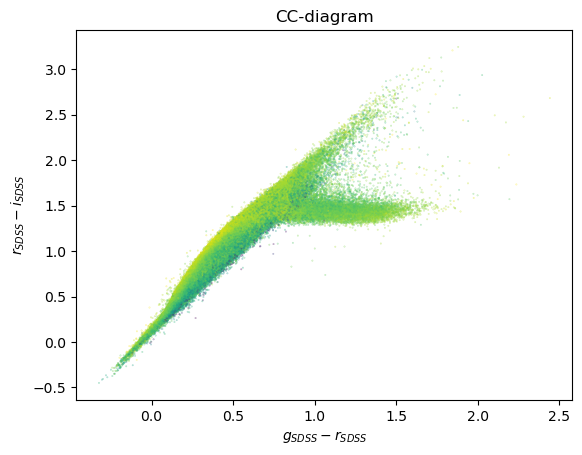

In [10]:
ri = data['r_sdss_mag']-data['i_sdss_mag']
gr = data['g_sdss_mag']-data['r_sdss_mag']
c = data["mh_gspphot"]

plt.scatter(ri, gr, c = c, s = 0.1, alpha = 0.5)

plt.xlabel('$g_{SDSS}-r_{SDSS}$')
plt.ylabel('$r_{SDSS}-i_{SDSS}$')
plt.title('CC-diagram')

plt.show()

# (IV) CC Diagram with Theoretically
Continued from (III). Assuming that main-sequence stars are (1) are perfect blackbody, (2) have  
uniform mass density $\rho = \rho_\odot$, where $\rho_\odot$ is the mass density of the Sun, and (3) satisfy the Virial  
theorem, and that the SDSS filter transmissions have a transmission rate of 100%, over-plot the  
theoretical prediction of the the main-sequence stars on the color-color diagram of $g_{SDSS}-r_{SDSS}$  
and $r_{SDSS}-i_{SDSS}$ you made in (III). **[12 pts]**

In [11]:
def bb_flux_at_lam(lam, T = 6000.0, **kwargs):
    # sanitize
    lam = np.array(lam, ndmin = 1)
    T = float(T)
    G = 6.7E-11
    h   = 6.6E-34
    kb = 1.38E-23
    c = 3.0E8
    
    intensity = 2.0 / lam**5 * h * c**2 * 1.0 / (np.exp(h * c / kb / T / lam) - 1)
    flux = np.pi * intensity
    
    return flux

def bb_flux_between_lam(lam1, lam2, T = 6000.0):
    lam1 = float(lam1)
    lam2 = float(lam2)
    T = float(T)

    # integral
    delta_lam = 2.0E-8
    lam_array = np.arange(lam1, lam2, delta_lam)
    flu_array = np.array([ bb_flux_at_lam(lam = ll, T = T) for ll in lam_array ])
    intgrtd_flux = np.sum(flu_array) * delta_lam
    
    return intgrtd_flux


def bb_mag_between_lam(lam1, lam2, T = 6000.0):
    intgrtd_flux = bb_flux_between_lam(lam1 = lam1, lam2 = lam2, T = T)
    mag = -2.5 * np.log10(intgrtd_flux)

    return mag

In [12]:
gmag = np.array([ bb_mag_between_lam(lam1 = 4000.0E-10, lam2 = 5500.0E-10, T = t) for t in temperature_array ])
rmag = np.array([ bb_mag_between_lam(lam1 = 5500.0E-10, lam2 = 6800.0E-10, T = t) for t in temperature_array ])
imag = np.array([ bb_mag_between_lam(lam1 = 6800.0E-10, lam2 = 8000.0E-10, T = t) for t in temperature_array ])

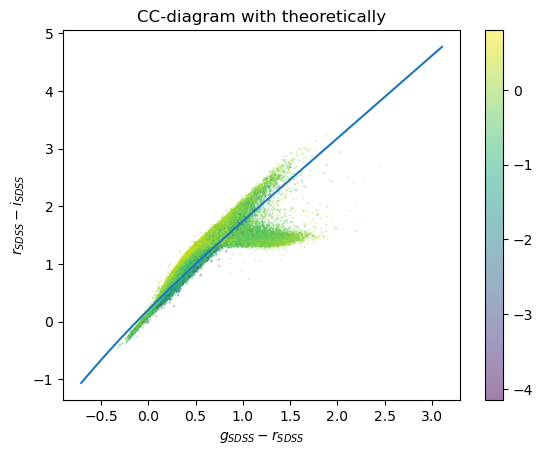

In [13]:
ri = data['r_sdss_mag']-data['i_sdss_mag']
gr = data['g_sdss_mag']-data['r_sdss_mag']
c = data["mh_gspphot"]

plt.scatter(ri, gr, c = c, s = 0.1, alpha = 0.5)
plt.plot(rmag - imag, gmag - rmag)
plt.colorbar()

plt.xlabel('$g_{SDSS}-r_{SDSS}$')
plt.ylabel('$r_{SDSS}-i_{SDSS}$')
plt.title('CC-diagram with theoretically')

plt.show()

# (V) $L-M$ Relation from GAIA
Plot the $L-M$ relation using the GAIA catalog. Estimate the slope $\alpha$ such that $L \propto M^\alpha$. **[8 pts]**

In [80]:
M = data['mass_flame']
L = data['lum_flame']

isNaN = np.logical_not(np.logical_or(np.isnan(M), np.isnan(L)))
M = M[isNaN]
L = L[isNaN]

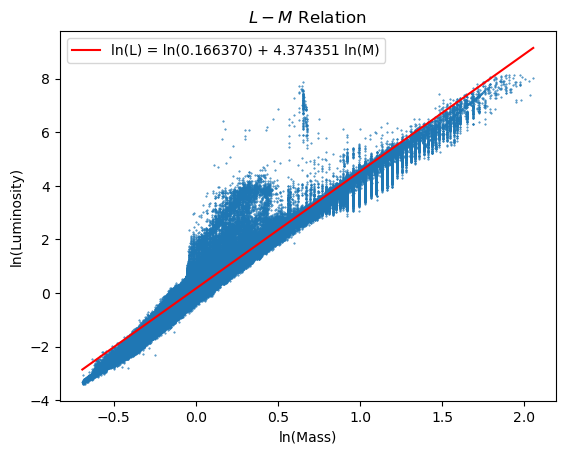

alpha = 4.374351


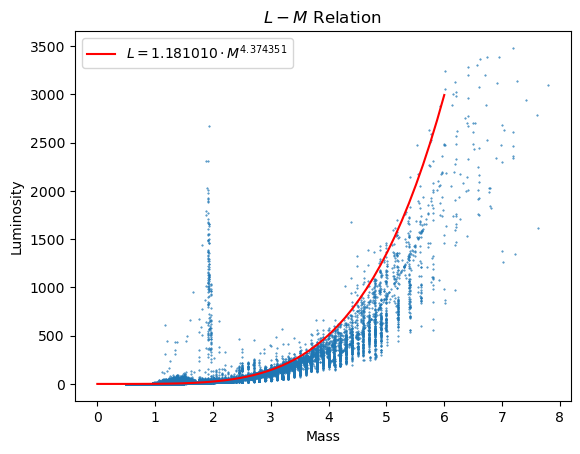

In [81]:
lnM = np.log(M)
lnL = np.log(L)

plt.scatter(lnM, lnL, s = 0.2)

fit = np.polyfit(lnM, lnL, 1)
x = (np.min(lnM), np.max(lnM))
plt.plot(x, 
         np.poly1d(fit)(x), 
         color='red',
         label='ln(L) = ln({:.6f}) + {:.6f} ln(M)'.format(fit[1], fit[0]))

plt.xlabel('ln(Mass)')
plt.ylabel('ln(Luminosity)')
plt.title('$L-M$ Relation')
plt.legend(loc = 'upper left')

plt.show()

# =======================================================================#

print('alpha = {:.6f}'.format(fit[0]))

# =======================================================================#

plt.scatter(M, L, s = 0.2)
x = np.linspace(0, 6, 50)
plt.plot(x, 
         np.exp(fit[1])*np.power(x, fit[0]),
         color='red',
         label='$L={:.6f} \cdot M^{{{:.6f}}}$'.format(np.exp(fit[1]), fit[0]))

plt.xlabel('Mass')
plt.ylabel('Luminosity')
plt.title('$L-M$ Relation')
plt.legend(loc = 'upper left')

plt.show()

# Trying remove strange data that $|M - 2| < 0.2$

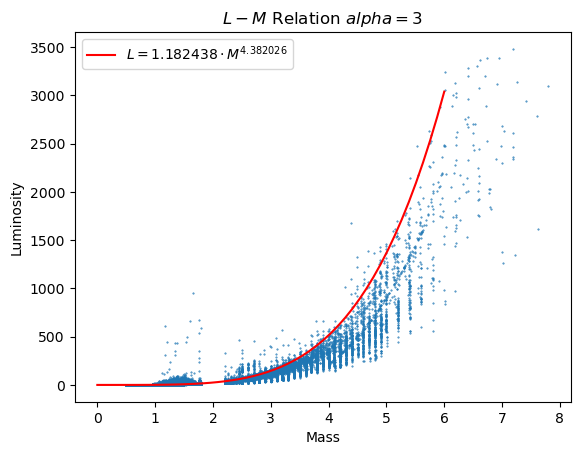

In [72]:
d = 0.2
m = M[(M < 2-d) | (M > 2+d)]
l = L[(M < 2-d) | (M > 2+d)]
    
lnm = np.log(m)
lnl = np.log(l)
fit = np.polyfit(lnm, lnl, 1)

plt.scatter(m, l, s = 0.2)
x = np.linspace(0, 6, 50)
plt.plot(x, 
         np.exp(fit[1])*np.power(x, fit[0]),
         color='red',
         label='$L={:.6f} \cdot M^{{{:.6f}}}$'.format(np.exp(fit[1]), fit[0]))

plt.xlabel('Mass')
plt.ylabel('Luminosity')
plt.title('$L-M$ Relation')
plt.legend(loc = 'upper left')

plt.show()